In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [3]:
import os
from PIL import Image

In [7]:
train_dataset_normal=os.listdir("../Medical/datasets/train/NORMAL/")
train_dataset_pne=os.listdir("../Medical/datasets/train/PNEUMONIA/")

In [8]:
print(len(train_dataset_normal))
print(len(train_dataset_pne))

1342
3875


In [13]:
random_normal=np.random.randint(0,len(train_dataset_normal))
normal_pic=train_dataset_normal[random_normal]
print("Normal:",random_normal," Name:",normal_pic)
random_pne=np.random.randint(0,len(train_dataset_pne))
pne_pic=train_dataset_pne[random_pne]
print("PNE:",random_pne,"Name:",pne_pic)

Normal: 316  Name: IM-0507-0001.jpeg
PNE: 796 Name: person1381_virus_2375.jpeg


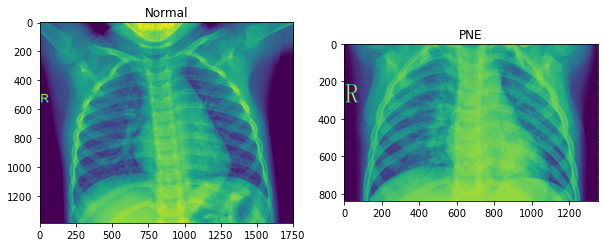

In [17]:
plt.figure(figsize=(10,8))

#Normal pic
normal_pic_show=Image.open("../Medical/datasets/train/NORMAL/"+normal_pic)
plt.subplot(1,2,1)
plt.title("Normal")
plt.imshow(normal_pic_show)

#abnormal
pne_pic_show=Image.open("../Medical/datasets/train/PNEUMONIA/"+pne_pic)
plt.subplot(1,2,2)
plt.title("PNE")
plt.imshow(pne_pic_show)

In [18]:
normal_pic_shape=plt.imread("../Medical/datasets/train/NORMAL/"+normal_pic).shape

In [19]:
normal_pic_shape

(1384, 1752)

In [25]:
model=Sequential()

#input layer
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#1st hidden layer
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd hidden layer
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd hidden layer
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#bridge layer
model.add(Flatten())
model.add(Dense(activation="relu",units=128))
model.add(Dense(activation="sigmoid",units=1))

In [26]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics="accuracy"
)

In [29]:
train_dataset_generator=ImageDataGenerator(rescale=1./255,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

In [30]:
test_dataset_generator=ImageDataGenerator(rescale=1./255)

In [31]:
train_dataset_manage=train_dataset_generator.flow_from_directory("../Medical/datasets/train/",
                                                                target_size=(128,128),
                                                                batch_size=32,
                                                                class_mode="binary")

test_dataset_manage=test_dataset_generator.flow_from_directory("../Medical/datasets/test/",
                                                                target_size=(128,128),
                                                                batch_size=32,
                                                                class_mode="binary")

val_dataset_manage=test_dataset_generator.flow_from_directory("../Medical/datasets/val/",
                                                                target_size=(128,128),
                                                                batch_size=32,
                                                                class_mode="binary")

Found 5217 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 256)      

In [33]:
history=model.fit_generator(train_dataset_manage,
                           steps_per_epoch=160,
                           epochs=10,
                           validation_data=val_dataset_manage,
                           validation_steps=600)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
160/160 [==============================] - 152s 951ms/step - loss: 8.8546e-08 - accuracy: 0.2572 - val_loss: 5.9605e-08 - val_accuracy: 0.5000
Epoch 2/10
160/160 [==============================] - 146s 915ms/step - loss: 8.8616e-08 - accuracy: 0.2566
Epoch 3/10
160/160 [==============================] - 147s 920ms/step - loss: 8.8406e-08 - accuracy: 0.2584
Epoch 4/10
160/160 [==============================] - 146s 911ms/step - loss: 8.8476e-08 - accuracy: 0.2578
Epoch 5/10
160/160 [==============================] - 146s 915ms/step - loss: 8.8734e-08 - accuracy: 0.2556
Epoch 6/10
160/160 [==============================] - 146s 910ms/step - loss: 8.8616e-08 - accuracy: 0.2566
Epoch 7/10
160/160 [==============================] - 146s 913ms/step - loss: 8.8640e-08 - accuracy: 0.2564
Epoch 8/10
160/160 [==============================] - 146s 910ms/step - loss: 8.8757e-08 - accuracy: 0.2555
Epoch 9/10
160

In [34]:
accurate=model.evaluate_generator(test_dataset_manage,steps=600)
print("Accuracy=",accurate[1]*100)

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy= 37.5
